In [43]:
import json
with open("../gnps_corinna_mona_massbank/trained_models/positive_mode_2000_2000_2000_layers_400_embedding_2024_09_24_11_41_53/inchikey_pairs.json", "r") as file:
    selected_pairs = json.load(file)

In [44]:
len(selected_pairs)

1223360

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1223360/1223360 [00:00<00:00, 2825160.31it/s]


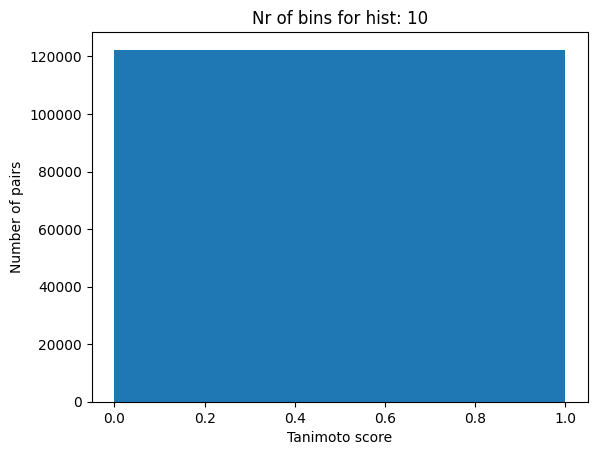

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1223360/1223360 [00:00<00:00, 2507941.87it/s]


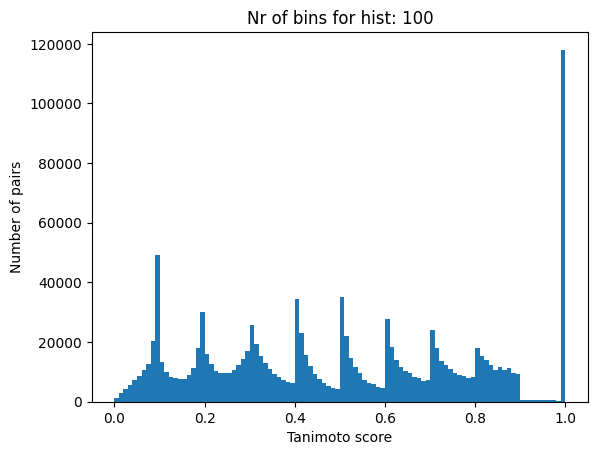

In [118]:
from matplotlib import pyplot as plt
from tqdm import tqdm


def plot_tanimoto_score_distribution(selected_pairs, nr_of_bins):
    tanimoto_score_distribution = [score for _,_, score in tqdm(selected_pairs)]
    bins = [i/nr_of_bins + 0.000001 for i in range(nr_of_bins+1)]
    bins[0] = 0
    plt.hist(tanimoto_score_distribution, bins=bins)
    plt.xlabel("Tanimoto score")
    plt.ylabel("Number of pairs")
    plt.title(f"Nr of bins for hist: {nr_of_bins}")
    plt.show()
plot_tanimoto_score_distribution(selected_pairs, 10)
plot_tanimoto_score_distribution(selected_pairs, 100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1223360/1223360 [00:01<00:00, 952488.25it/s]


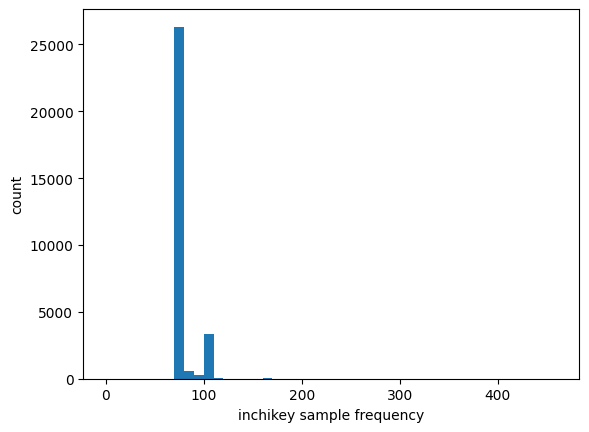

In [101]:
from tqdm import tqdm

def plot_inchikey_sampling_freq(selected_pairs):
    inchikey_scores = {}
    for inchikey_1, inchikey_2, score in tqdm(selected_pairs):
        if inchikey_1 in inchikey_scores:
            inchikey_scores[inchikey_1].append(score)
        else:
            inchikey_scores[inchikey_1] = []
        if inchikey_2 in inchikey_scores:
            inchikey_scores[inchikey_2].append(score)
        else:
            inchikey_scores[inchikey_2] = []
    inchikey_sampling_frequency = [len(scores) for scores in inchikey_scores.values()]
    plt.hist(inchikey_sampling_frequency, bins=range(0, max(inchikey_sampling_frequency)+10, 10))
    plt.xlabel("inchikey sample frequency")
    plt.ylabel("count")
    plt.show()
plot_inchikey_sampling_freq(selected_pairs)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1223360/1223360 [00:01<00:00, 942295.65it/s]


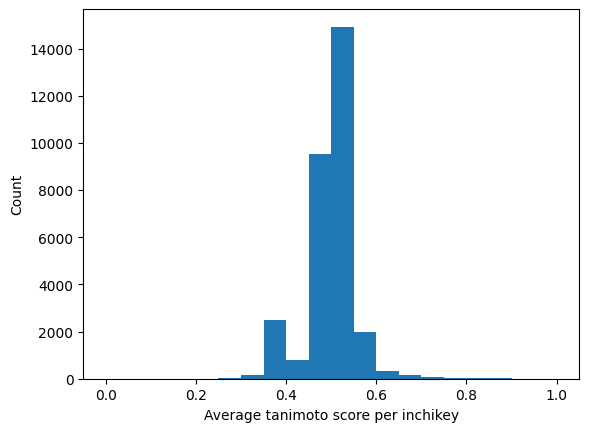

In [110]:
def plot_inchikey_average_tanimoto_score(selected_pairs, nr_of_bins = 10):
    inchikey_scores = {}
    for inchikey_1, inchikey_2, score in tqdm(selected_pairs):
        if inchikey_1 in inchikey_scores:
            inchikey_scores[inchikey_1].append(score)
        else:
            inchikey_scores[inchikey_1] = []
        if inchikey_2 in inchikey_scores:
            inchikey_scores[inchikey_2].append(score)
        else:
            inchikey_scores[inchikey_2] = []
    inchikey_average_sampling = [sum(scores)/len(scores) for scores in inchikey_scores.values()]
    plt.hist(inchikey_average_sampling, bins=[i/nr_of_bins for i in range(nr_of_bins+1)])
    plt.xlabel("Average tanimoto score per inchikey")
    plt.ylabel("Count")
    plt.show()
plot_inchikey_average_tanimoto_score(selected_pairs, nr_of_bins=20)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1223360/1223360 [00:01<00:00, 873475.97it/s]


0.7718181184310222


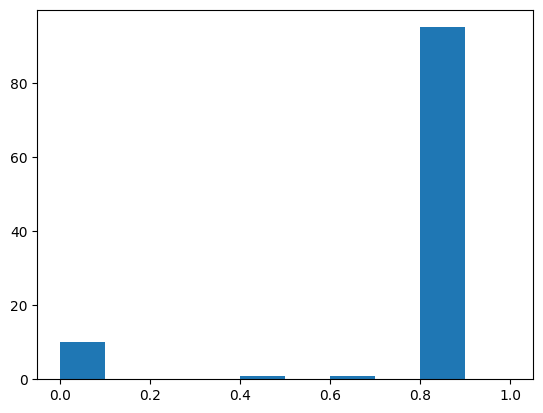

0.7684454886536849


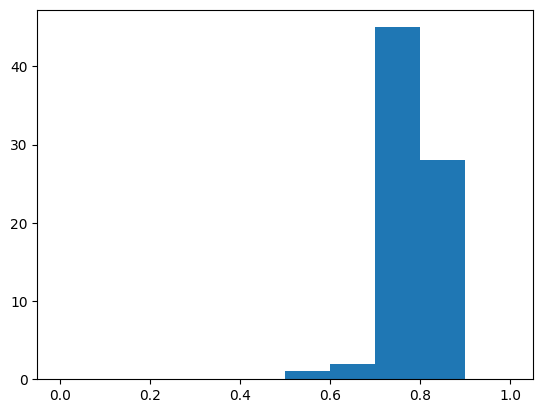

0.8321839491836727


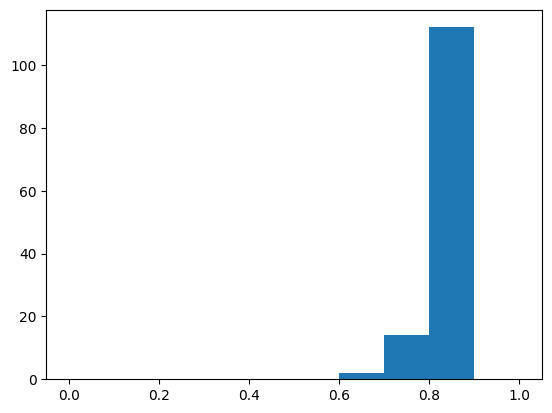

0.7965855826650347


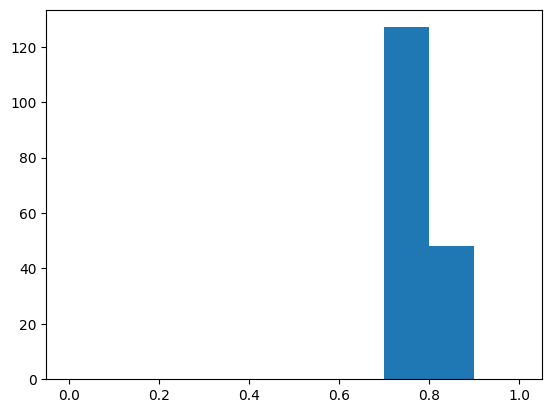

0.7661509606745336


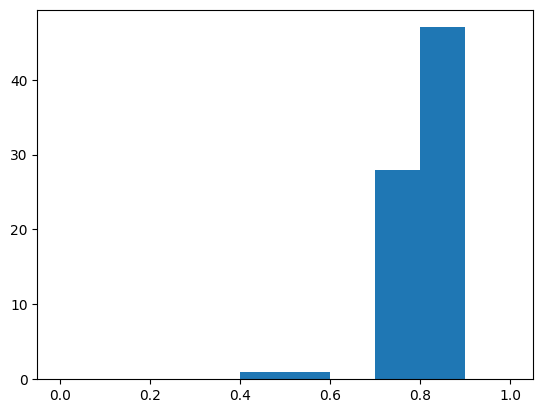

0.7873972073385987


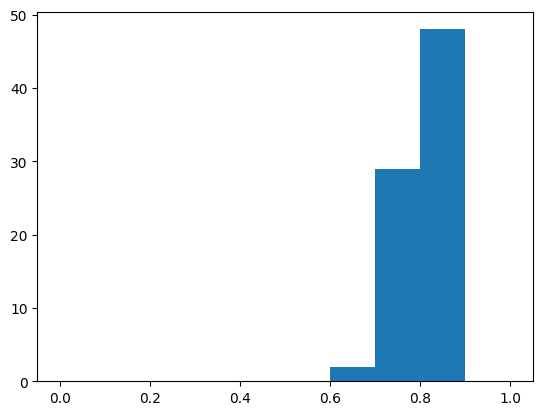

0.785284607518803


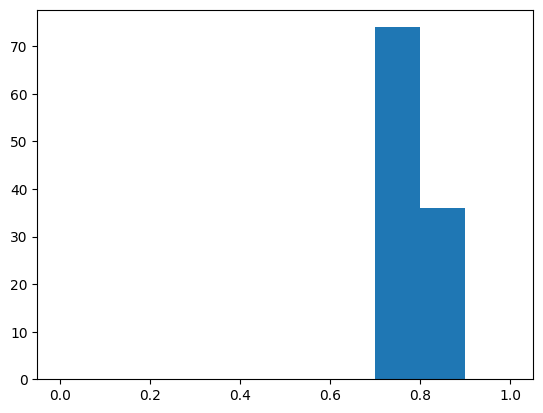

0.8672052242168008


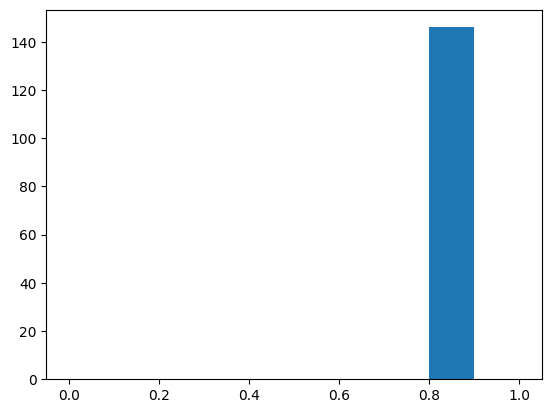

0.8407740845130041


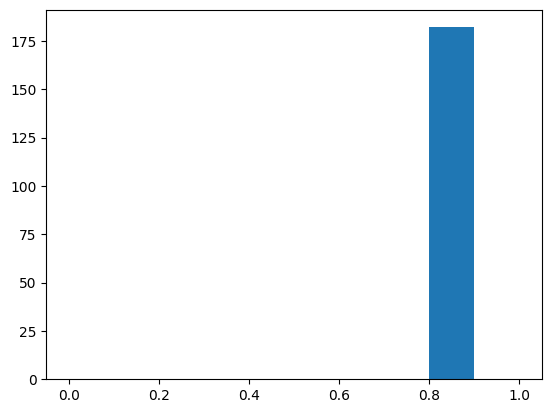

0.7903986867967543


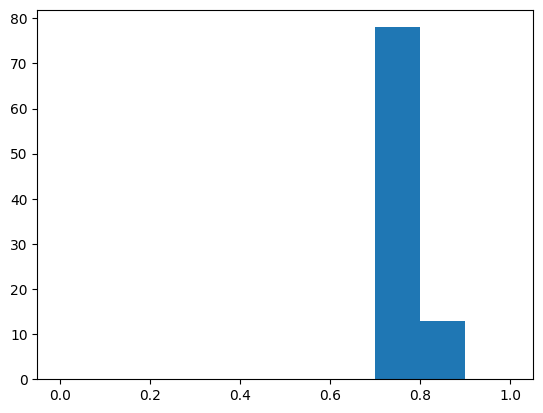

0.8550443950905857


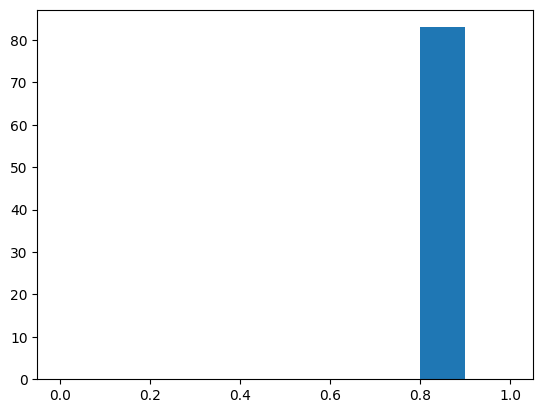

0.8451914840510913


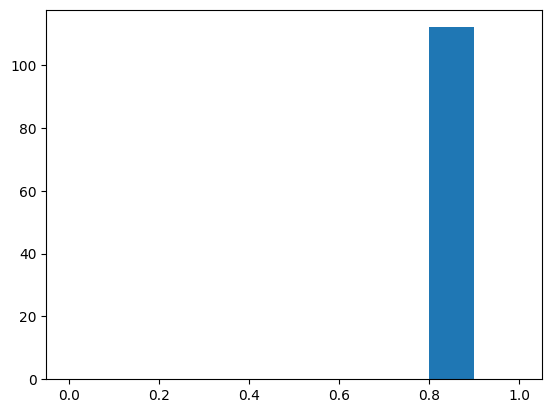

0.7827015944149183


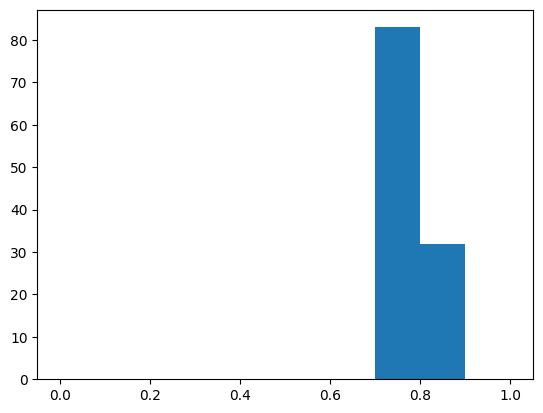

0.7503523561033872


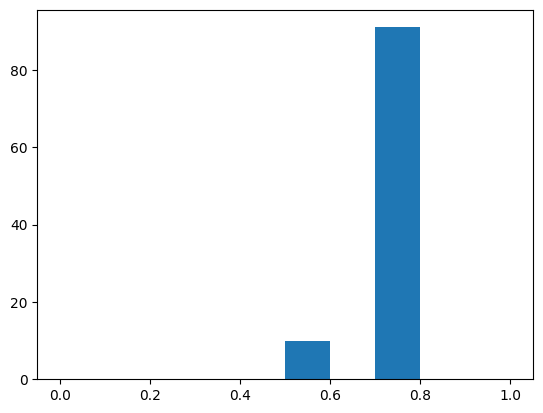

0.7649253030121327


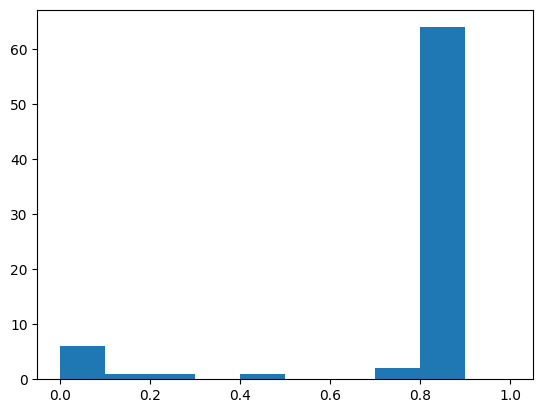

0.7503663194179535


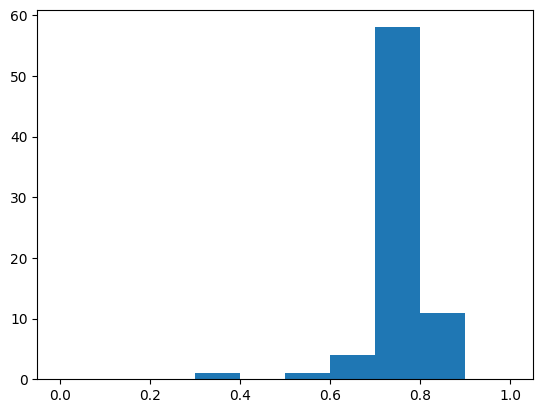

0.8179670389493306


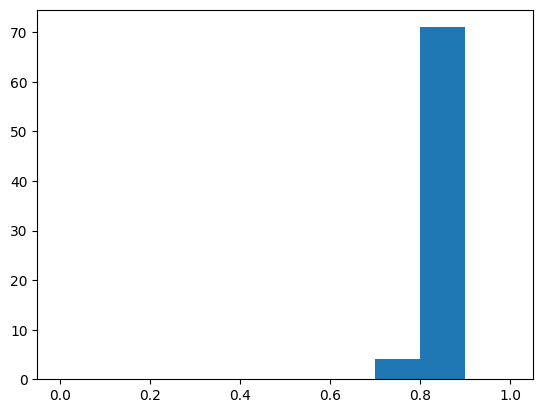

0.7557607463427952


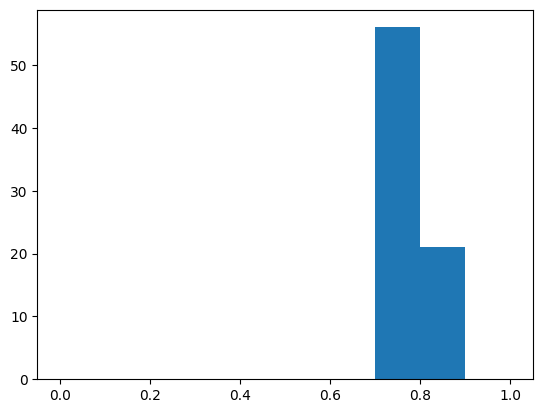

0.8817444977372192


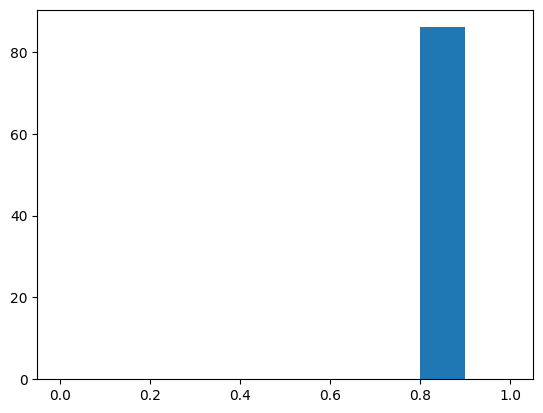

0.7806031179648859


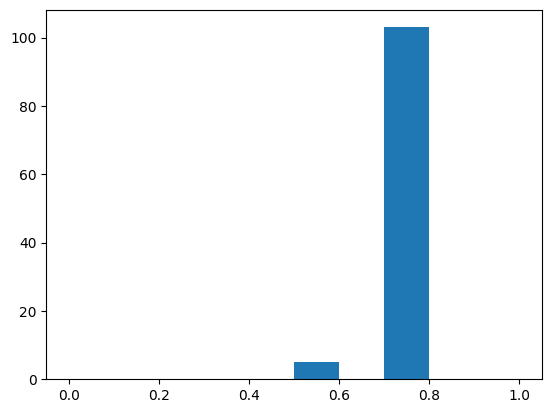

0.82013461147387


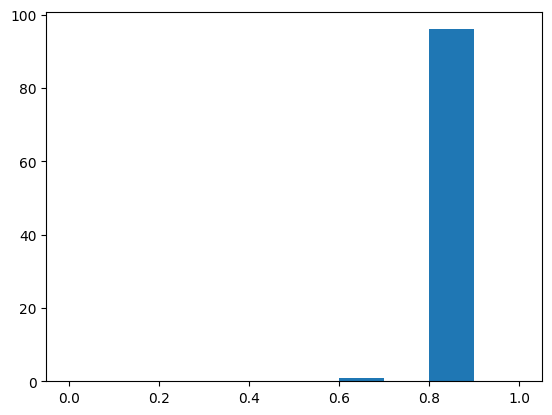

0.7529033918663398


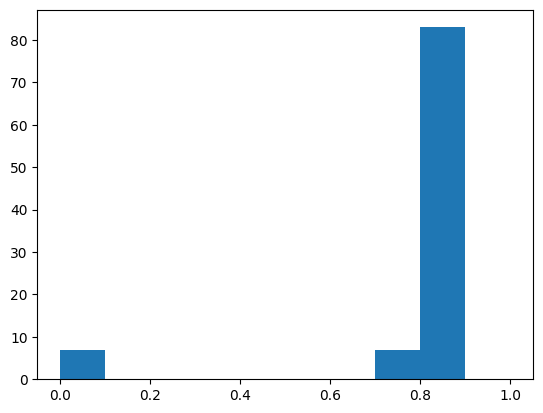

0.8195058801506139


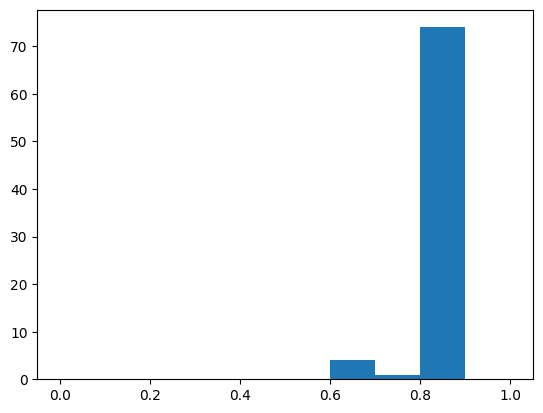

0.8784885706901551


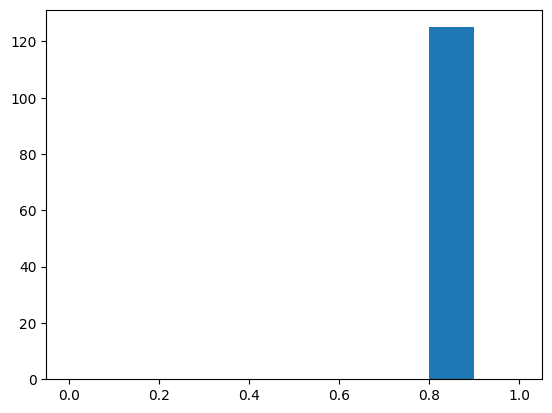

0.8631462294321793


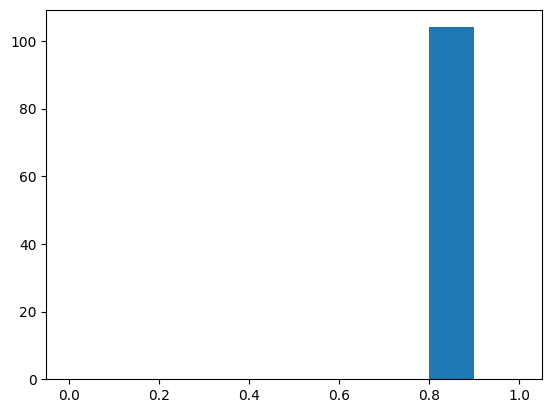

0.8598739496258457


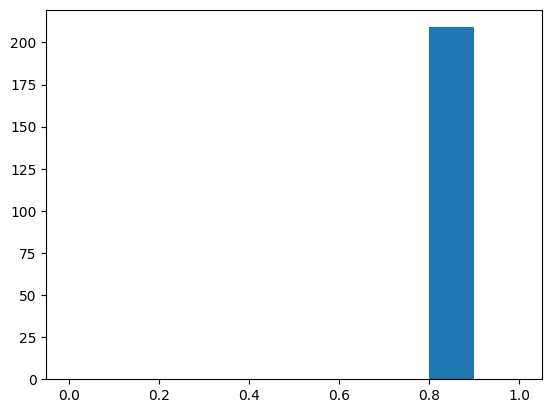

0.7899592595299085


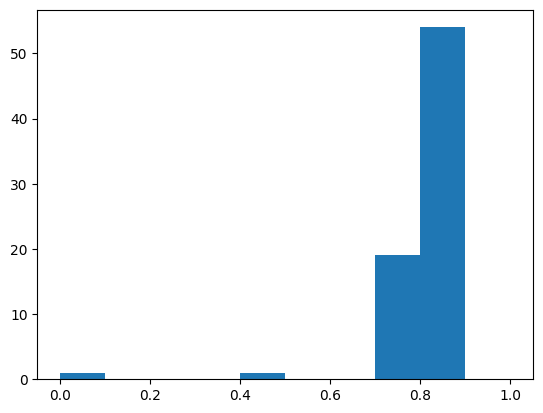

0.8070129601160685


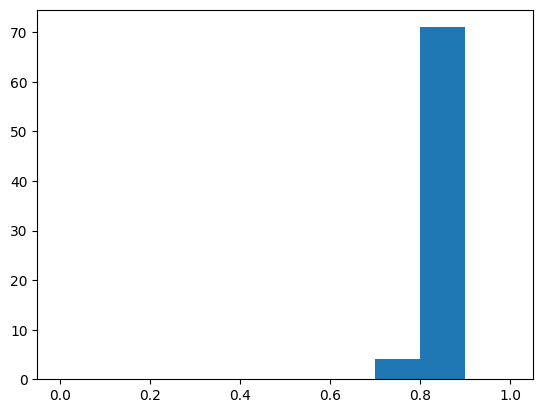

0.8763815714762762


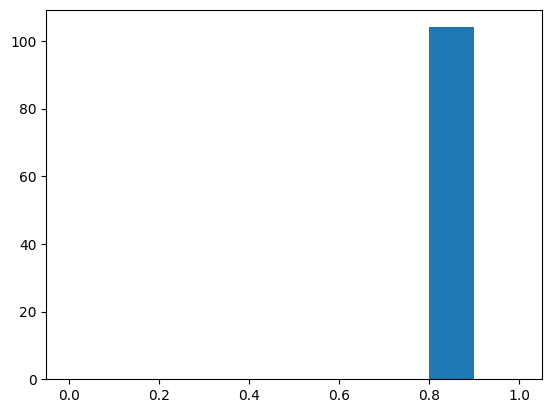

0.7744830287992954


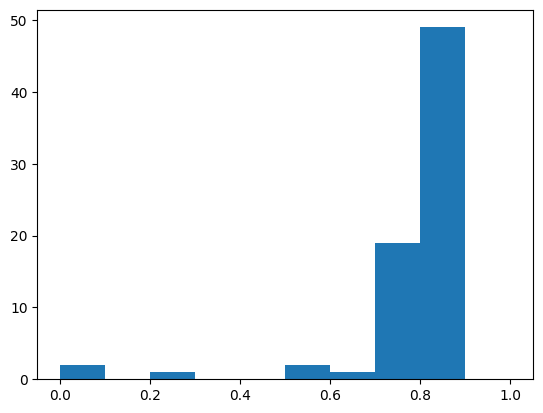

0.8781031267001078


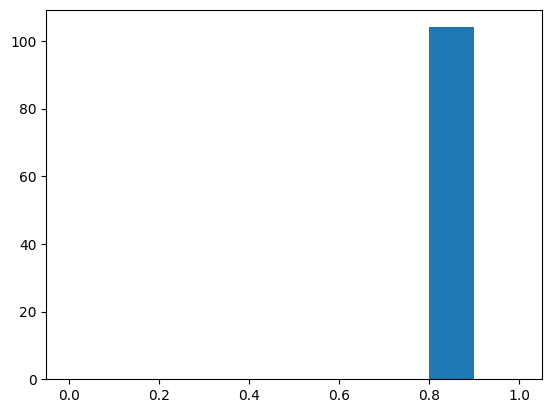

0.8453619341765132


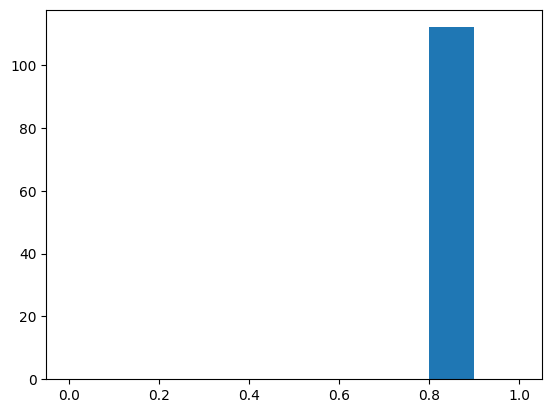

0.7931468056029632


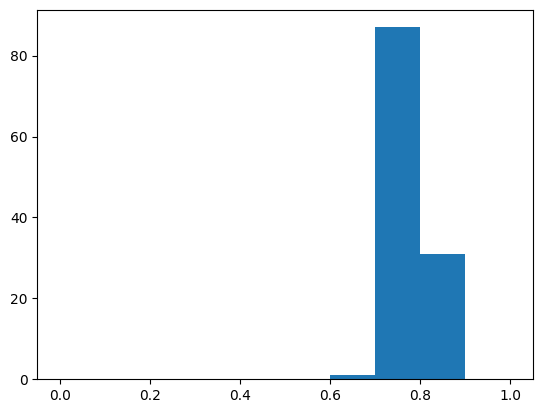

0.7528879670302073


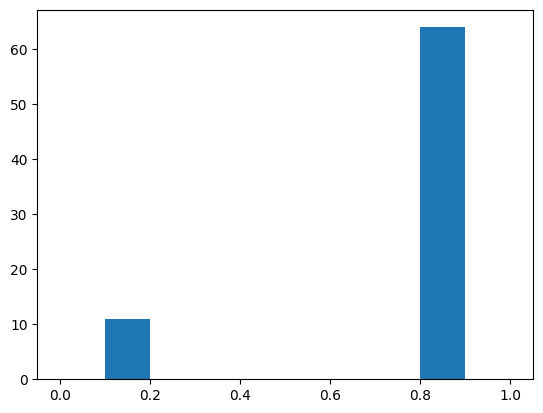

0.810865393416448


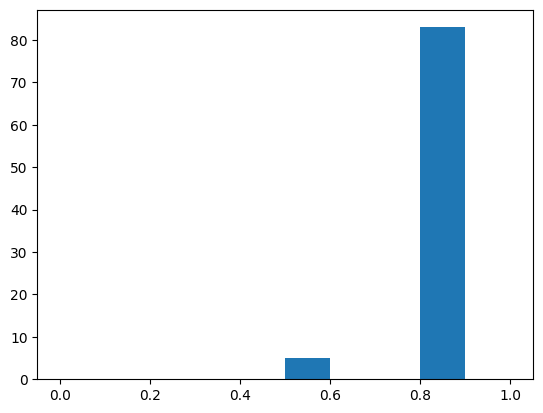

0.7507234239397017


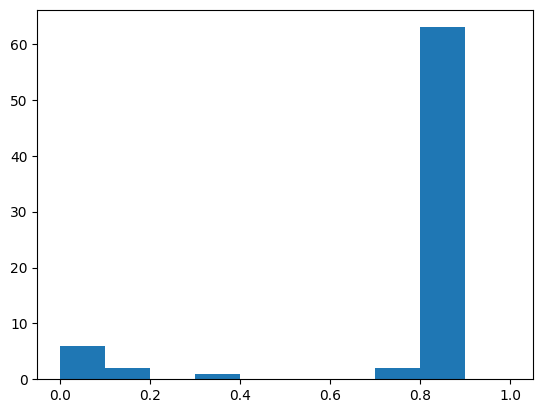

0.7674598663051924


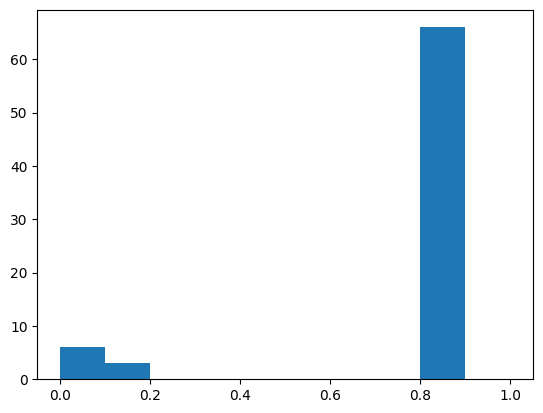

0.8543327156599466


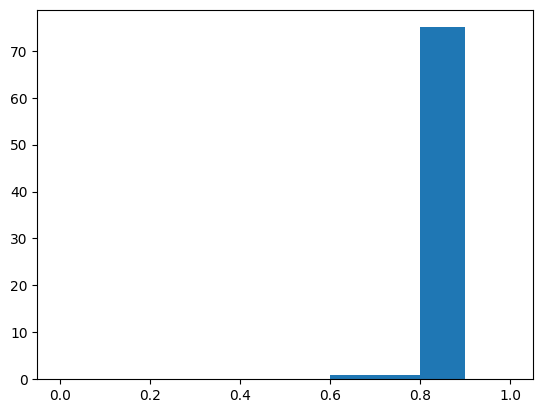

0.768750128922639


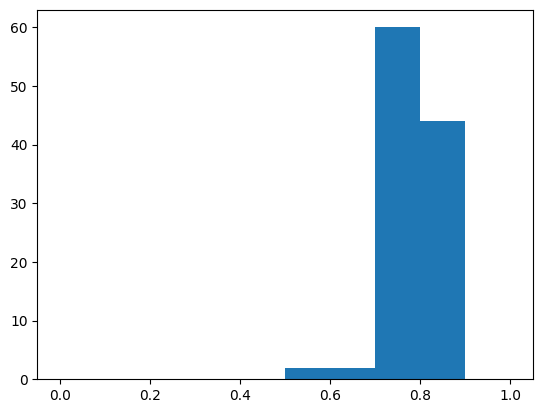

0.7538222422694215


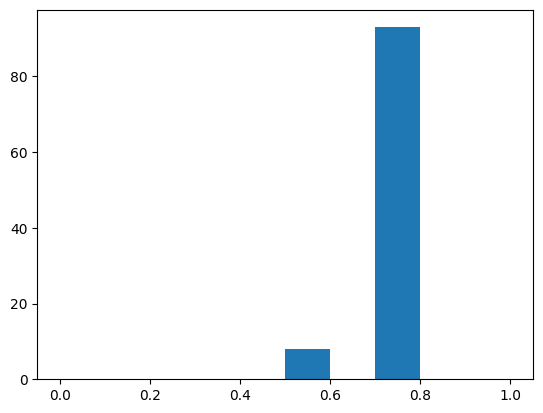

0.852765165718205


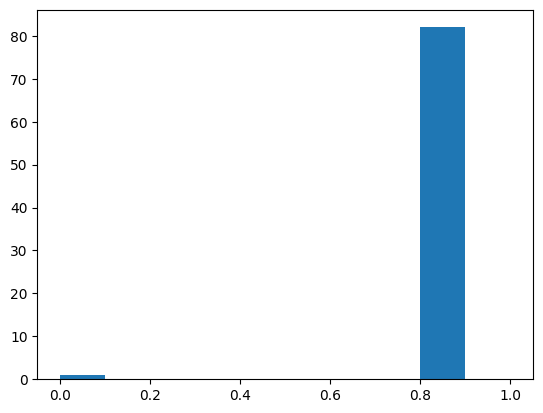

0.8319486166094686


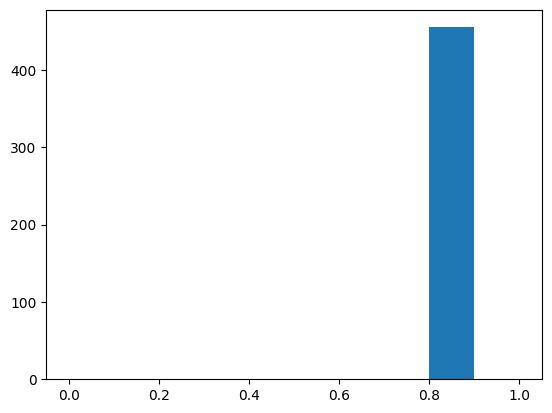

0.756034261683623


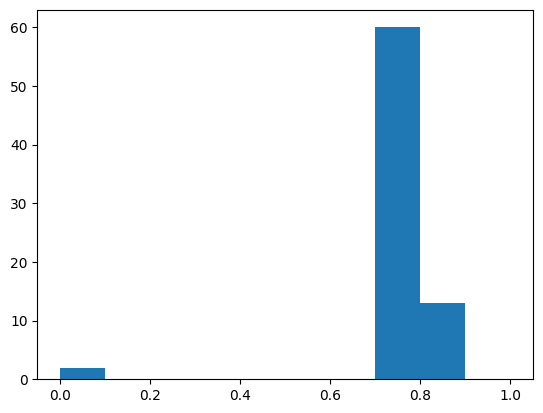

0.8220908443133036


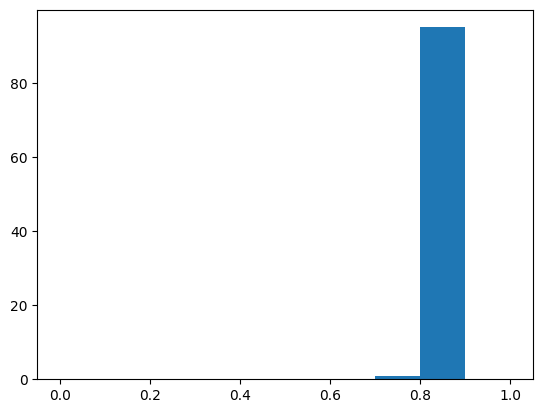

0.7712688224437909


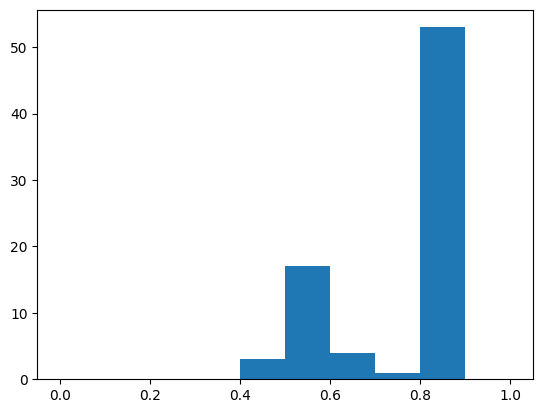

0.768700856127237


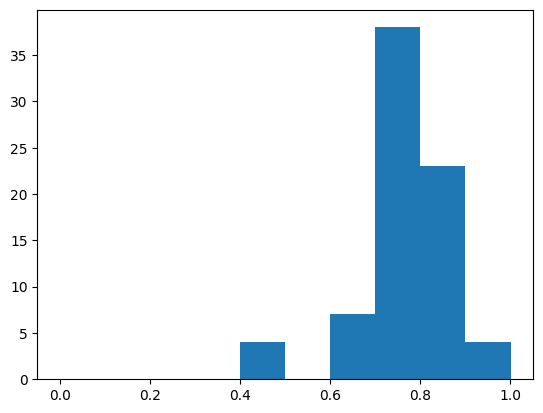

0.784707205205024


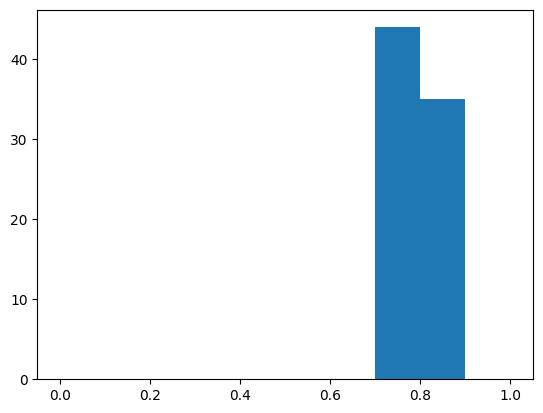

0.7651484358955074


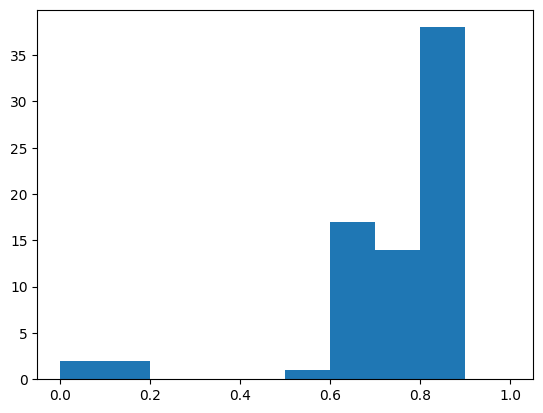

0.7647810655832291


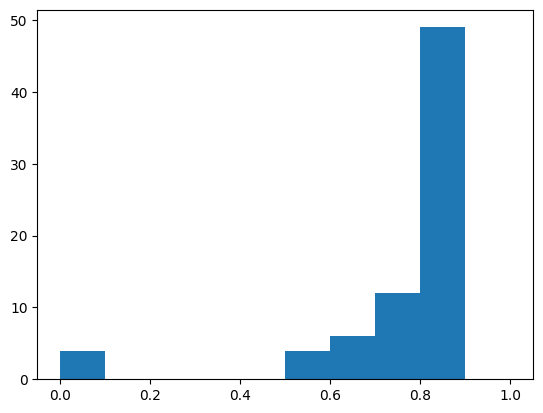

0.8392148908527418


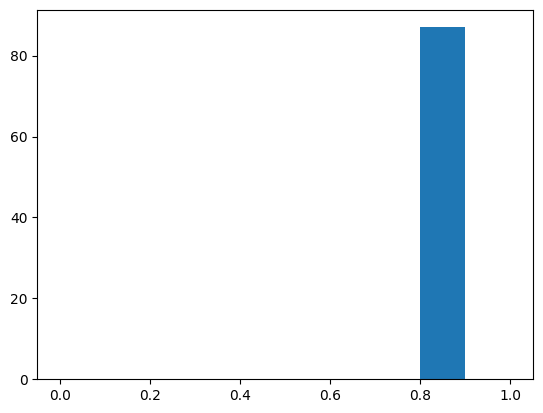

In [116]:
def plot_distribution_per_inchikey_within_average_score_range(selected_pairs, minimum=0.8, maximum=1.1):
    inchikey_scores = {}
    for inchikey_1, inchikey_2, score in tqdm(selected_pairs):
        if inchikey_1 in inchikey_scores:
            inchikey_scores[inchikey_1].append(score)
        else:
            inchikey_scores[inchikey_1] = []
        if inchikey_2 in inchikey_scores:
            inchikey_scores[inchikey_2].append(score)
        else:
            inchikey_scores[inchikey_2] = []
    shuffled_inchikeys = list(inchikey_scores.keys())
    random.shuffle(shuffled_inchikeys)
    for inchikey in shuffled_inchikeys:
        scores = inchikey_scores[inchikey]
        if  maximum > sum(scores)/len(scores) > minimum:
            print(sum(scores)/len(scores))
            plt.hist(scores, bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.001])
            plt.show()
plot_distribution_per_inchikey_within_average_score_range(selected_pairs, minimum=0.75, maximum=1.1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1223360/1223360 [00:03<00:00, 400729.94it/s]


0.709385954752201


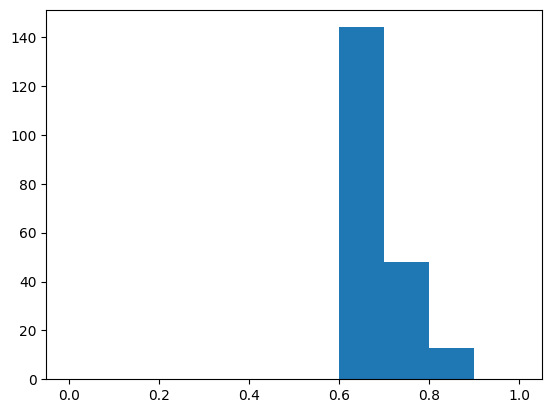

0.6376846174159682


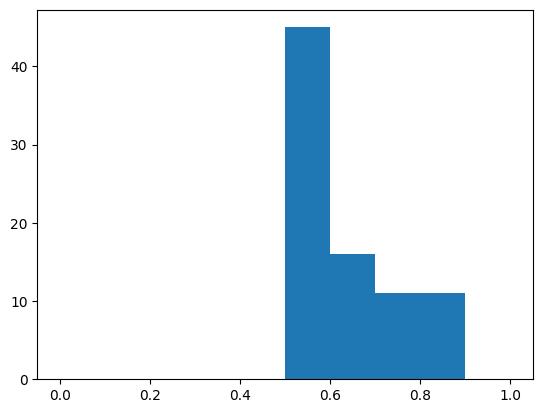

0.7337402832018186


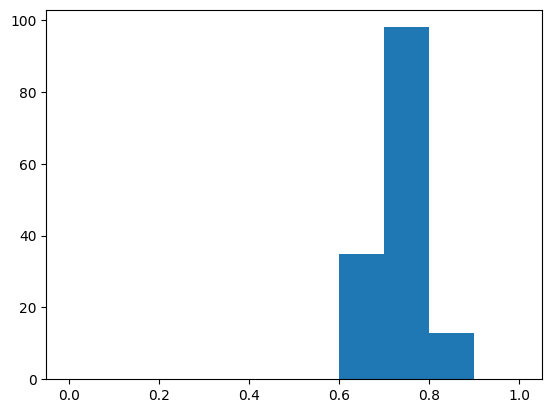

0.7873972073385987


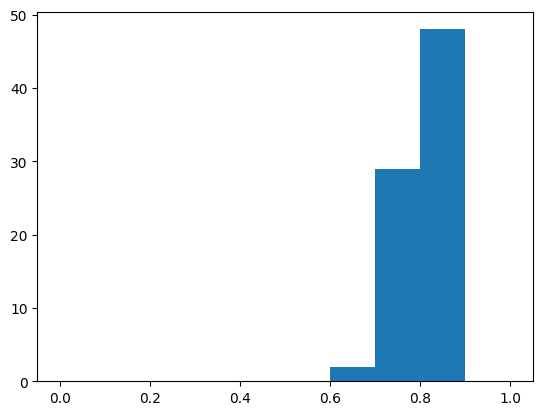

0.674439846027282


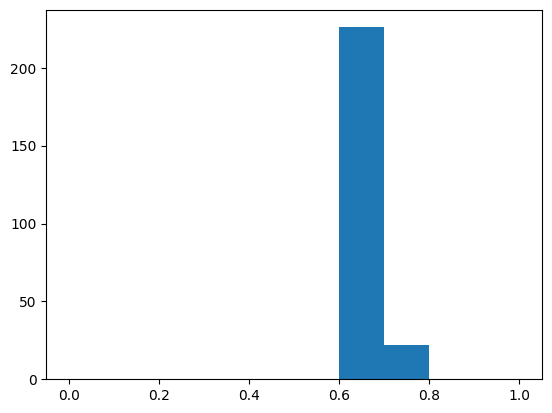

0.8179670389493306


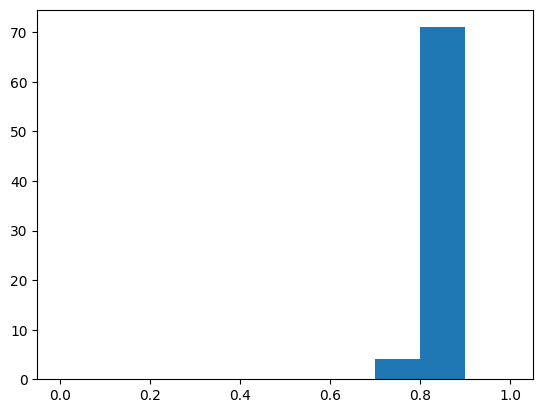

0.8781031267001078


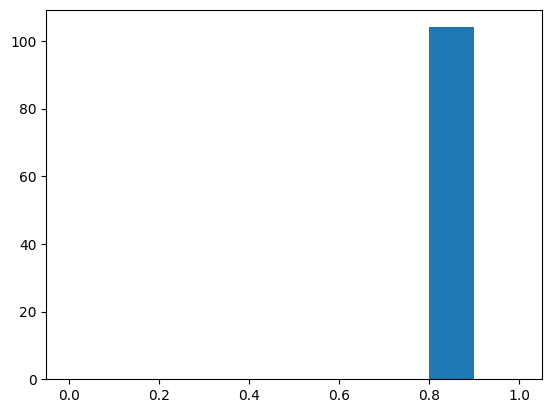

0.8407740845130041


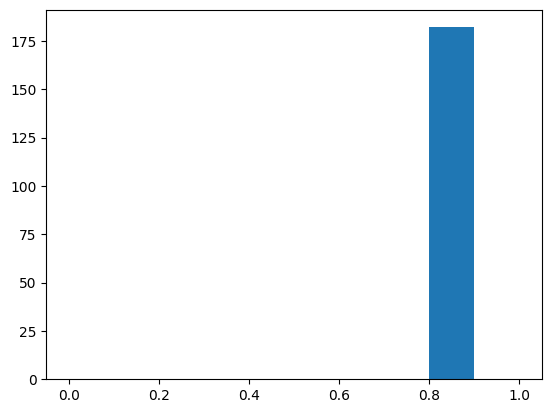

0.8195058801506139


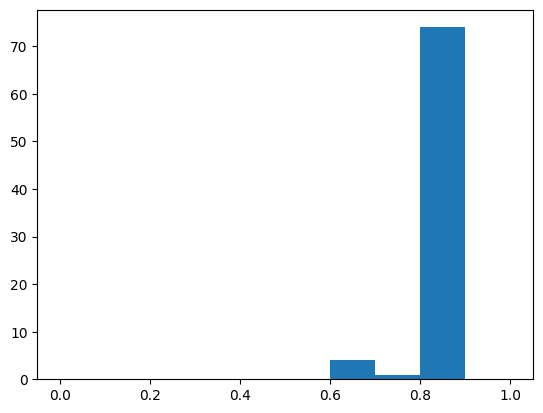

0.8817444977372192


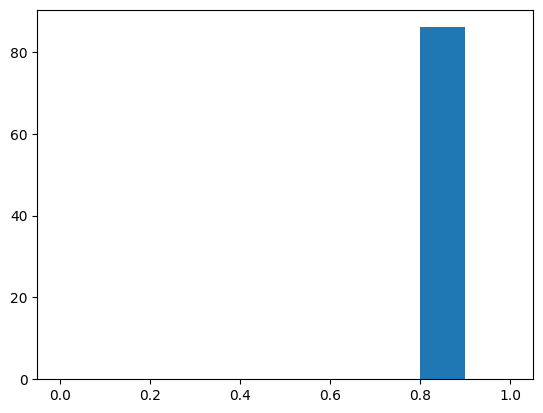

0.7127174197972476


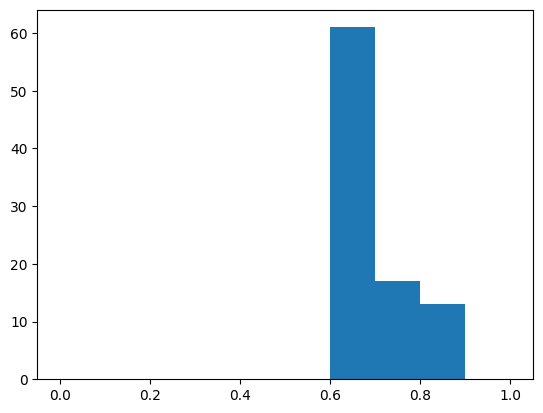

0.8631462294321793


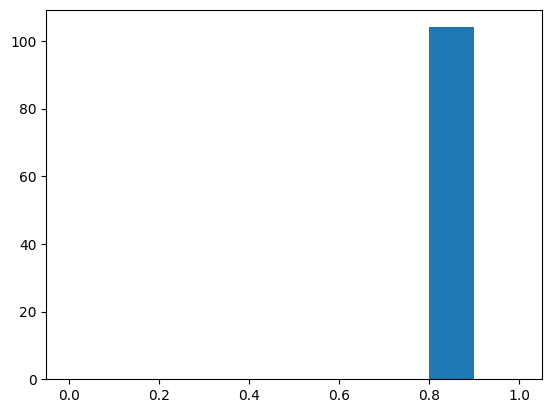

0.660654009758741


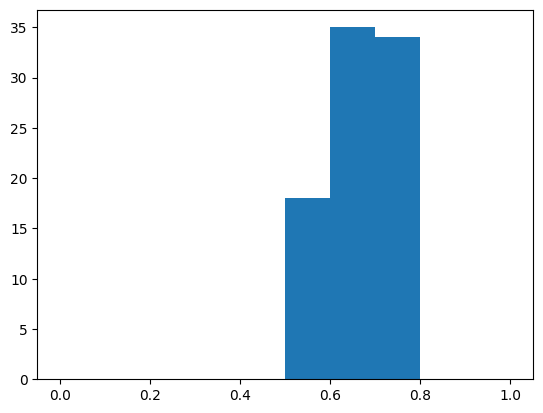

0.7538222422694215


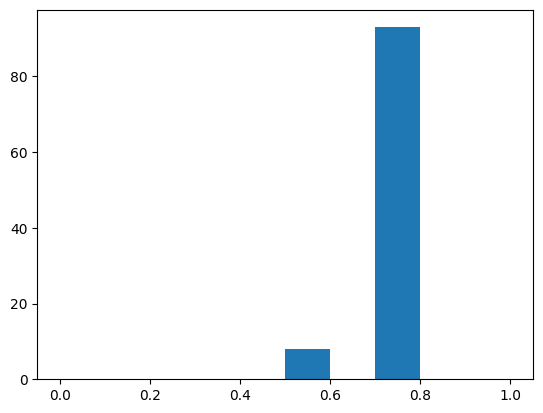

0.6987040877342224


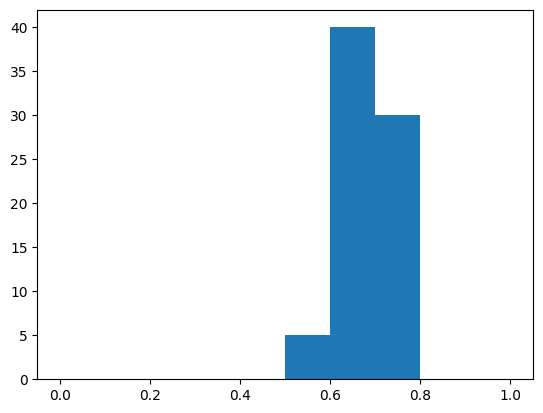

0.7931468056029632


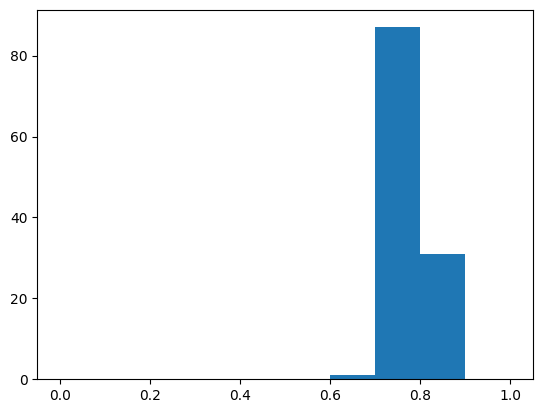

0.8451914840510913


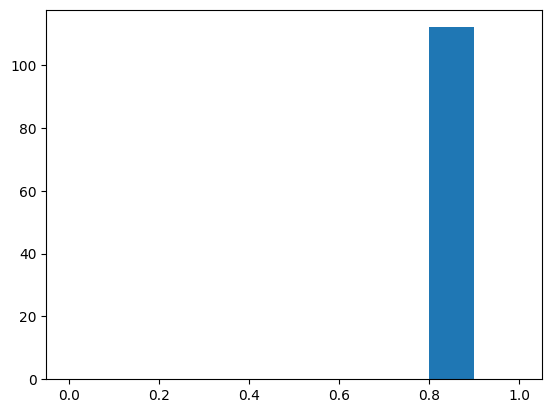

0.7419923025451295


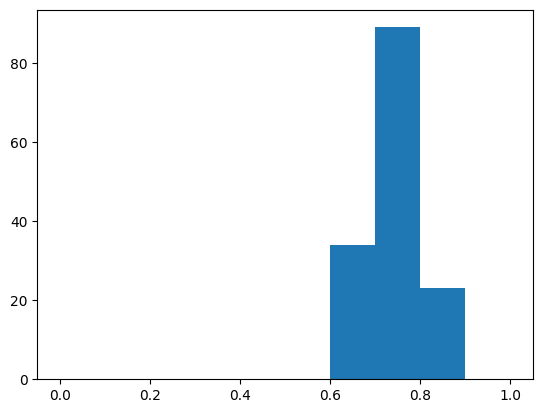

0.8321839491836727


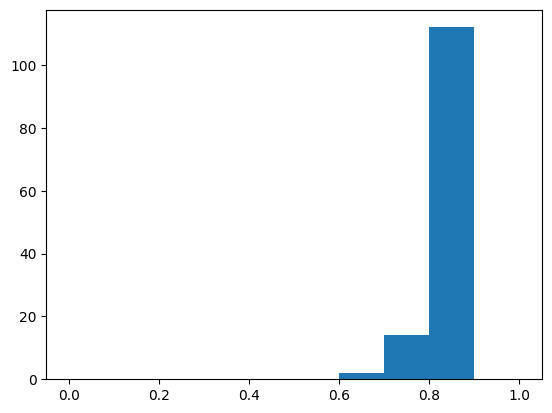

0.7436899317033363


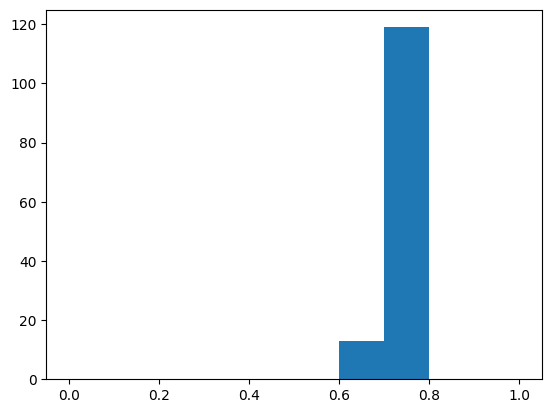

0.7378653064370155


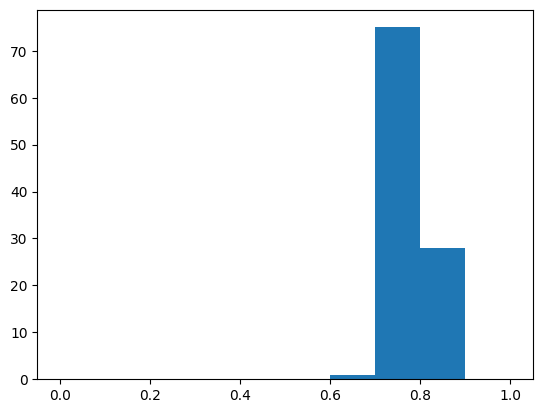

0.5851607875858279


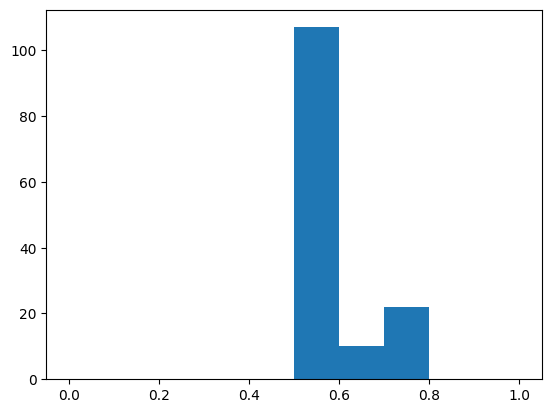

0.7353110309388187


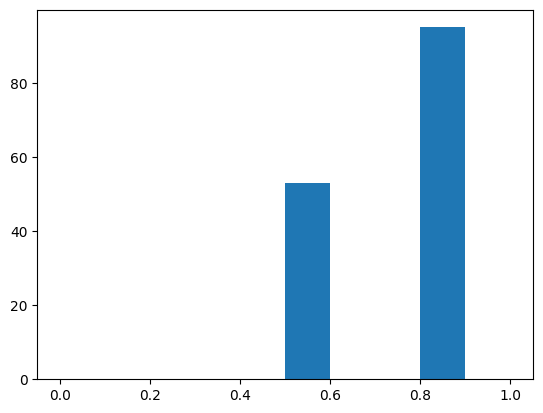

0.6658555582547799


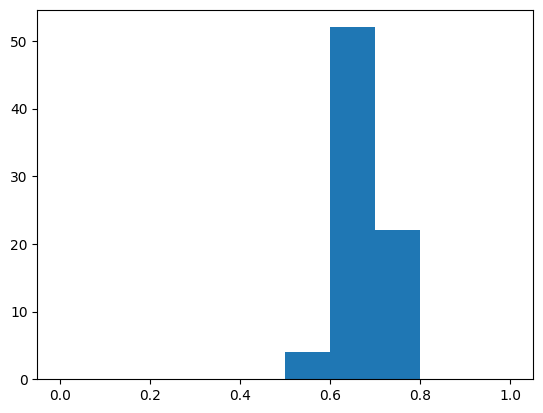

0.7121402595069383


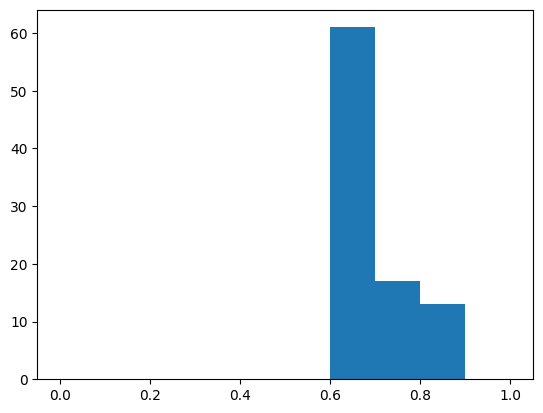

0.5787163730980693


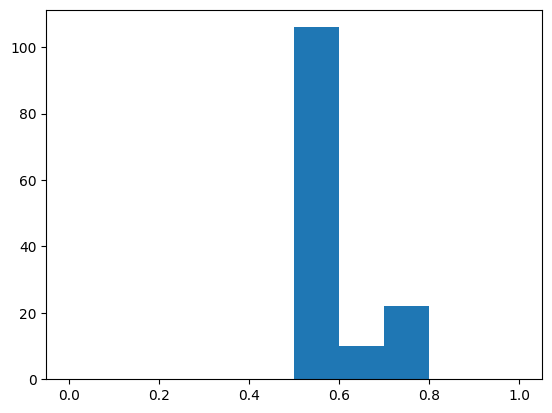

0.8319486166094686


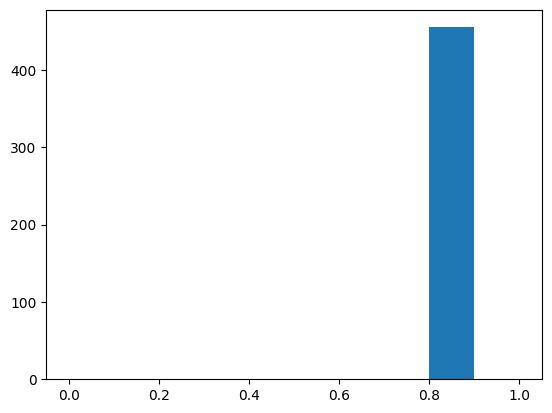

0.6851898926225576


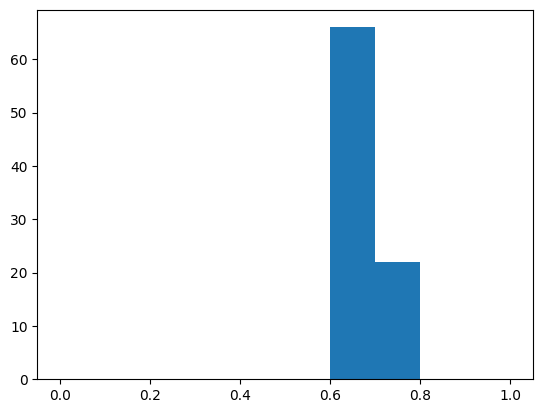

0.785284607518803


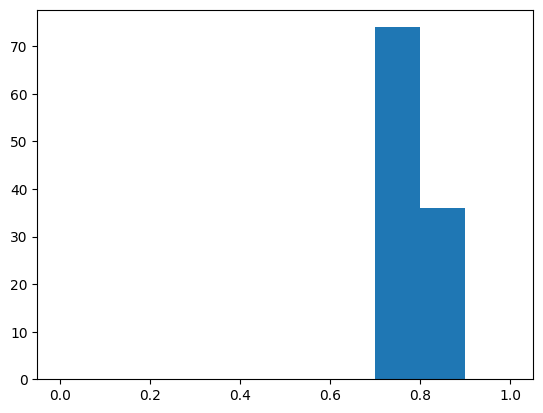

0.734605121694199


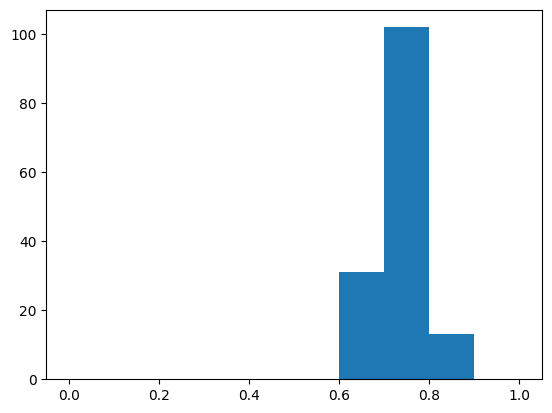

0.6364068044237343


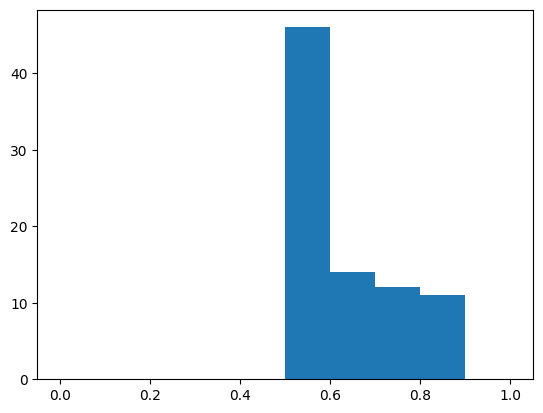

0.6607648567719893


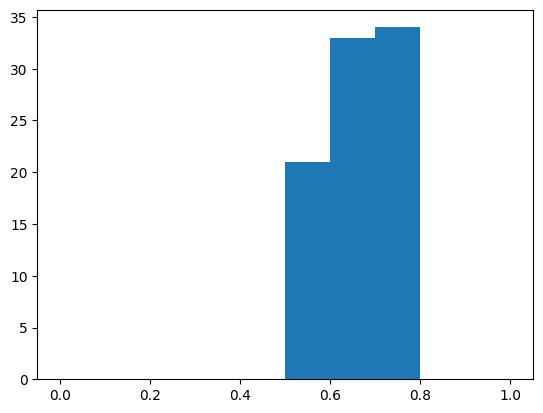

0.8763815714762762


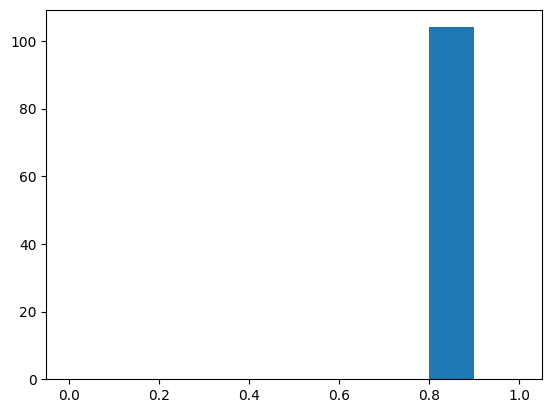

0.6982095943556892


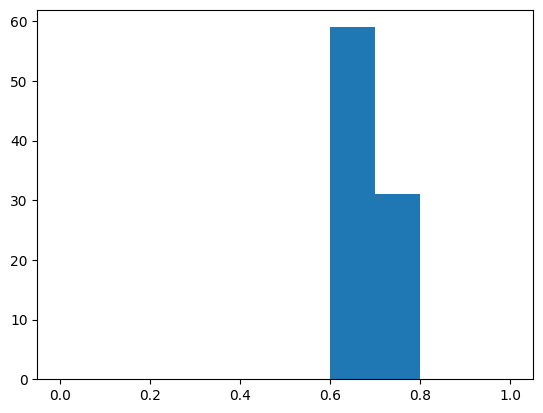

0.8672052242168008


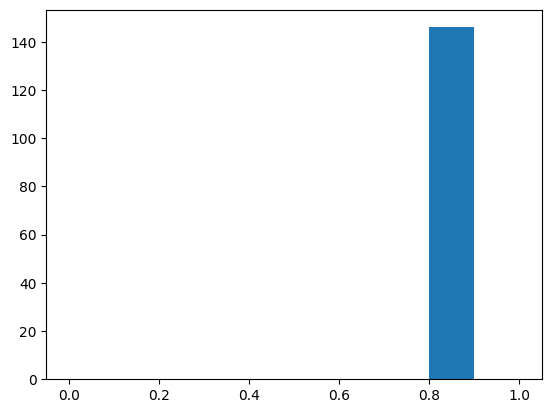

0.7448597428473559


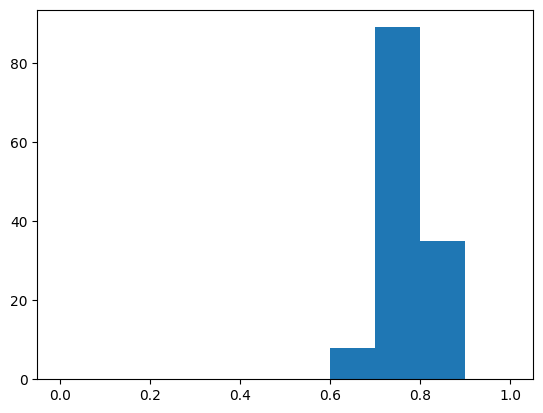

0.7106227278709412


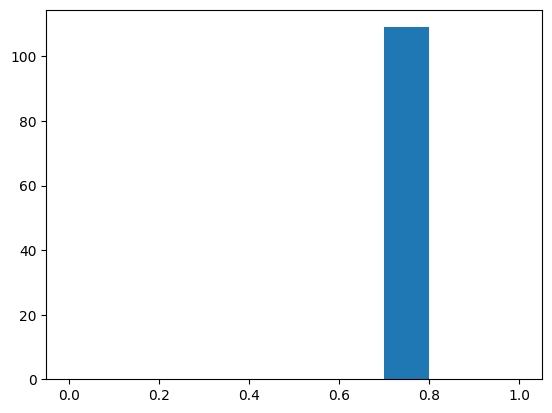

0.8392148908527418


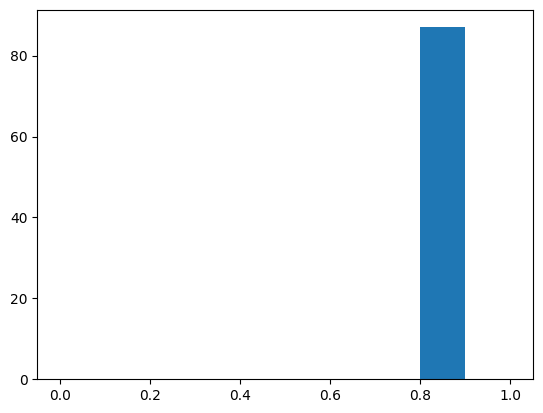

0.8543327156599466


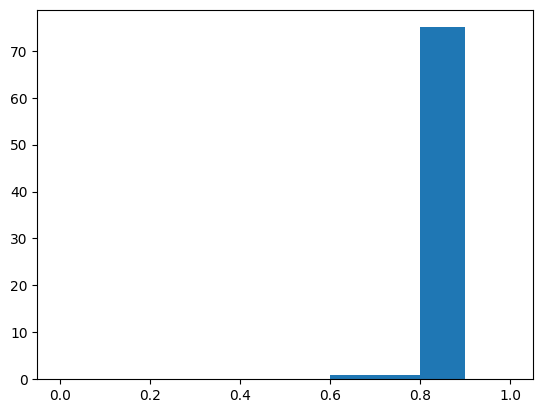

0.8598739496258457


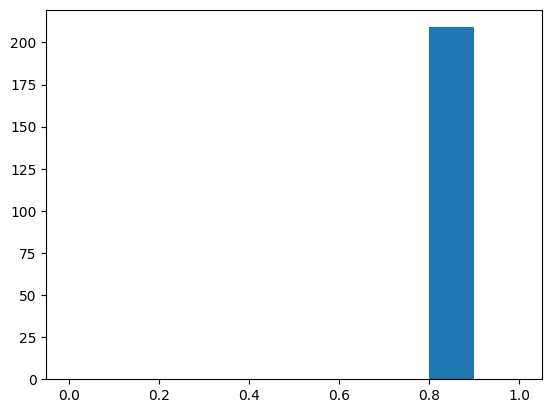

0.8784885706901551


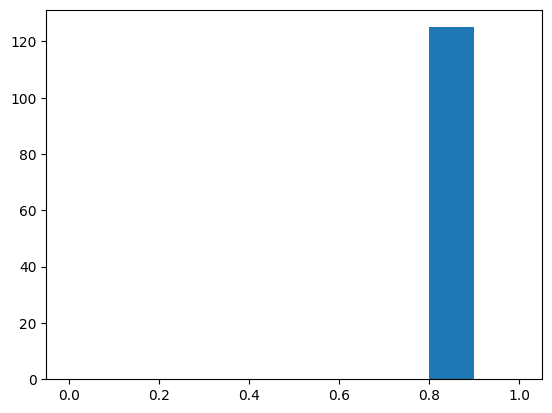

0.7806031179648859


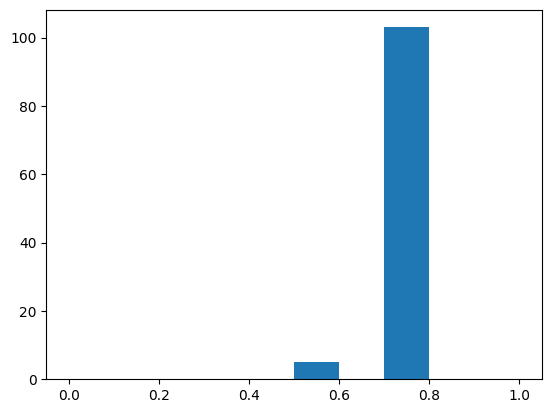

0.5795849779226484


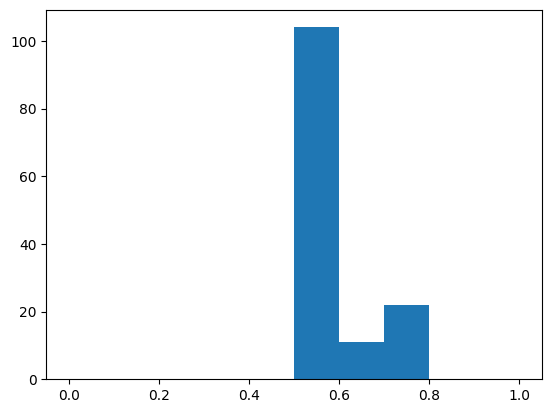

0.7161206331434129


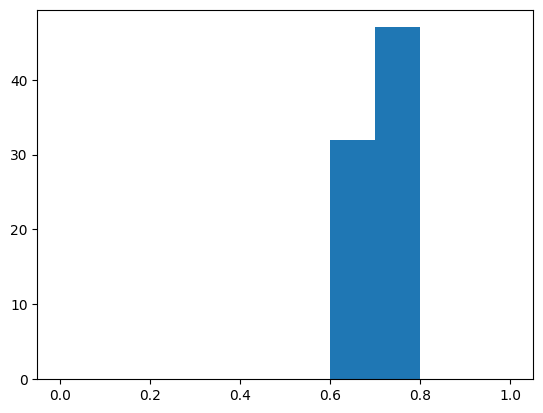

0.6407498660541716


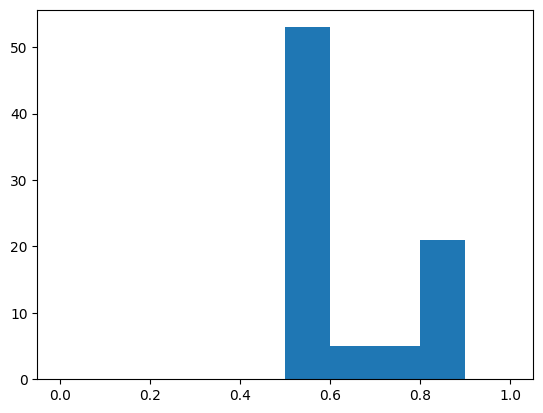

0.5999962907461893


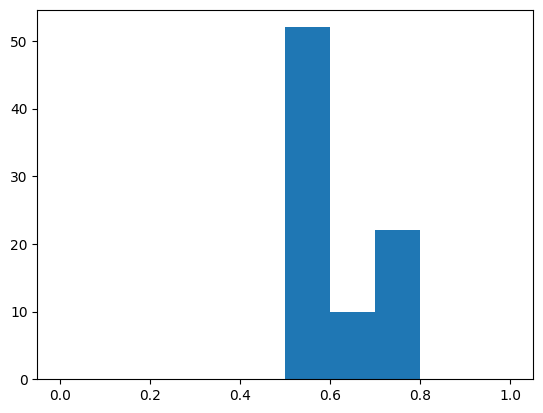

0.784707205205024


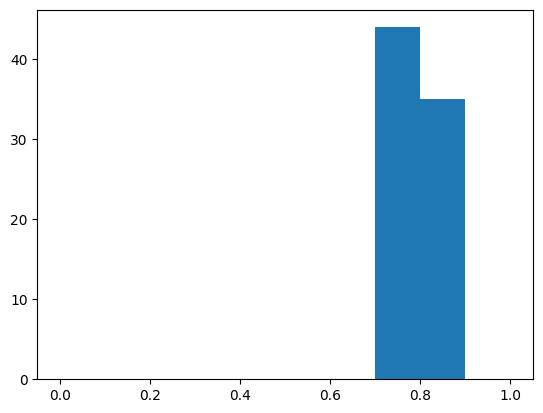

0.7344100953716981


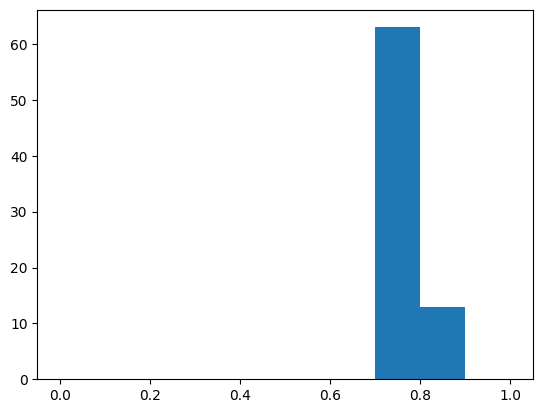

0.7503523561033872


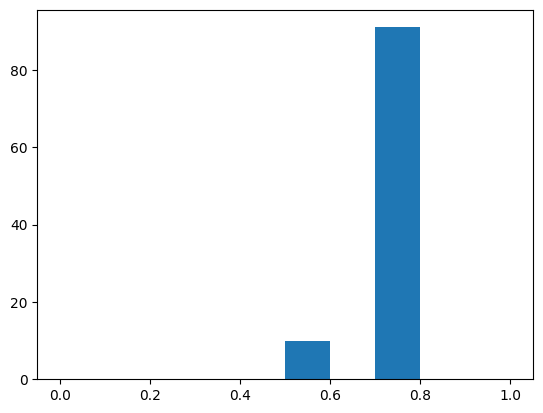

0.7384836247989109


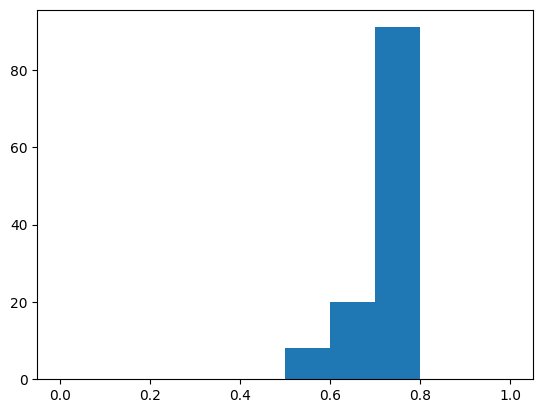

0.7187396861039675


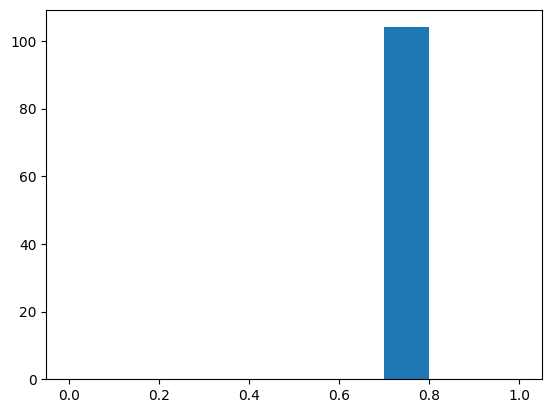

0.6933694355976507


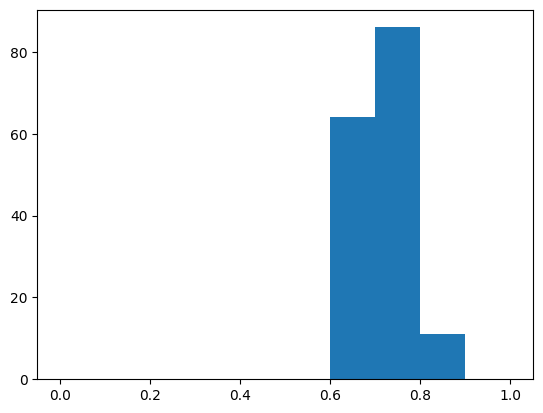

0.7965855826650347


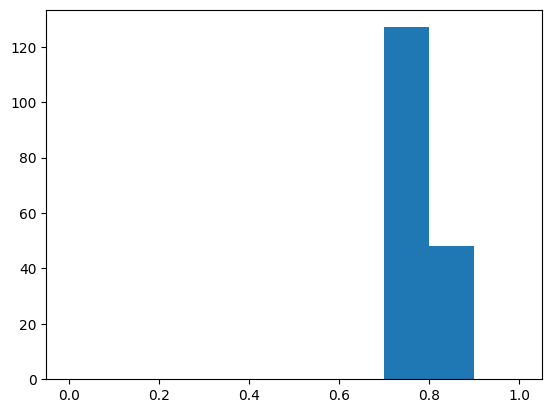

0.82013461147387


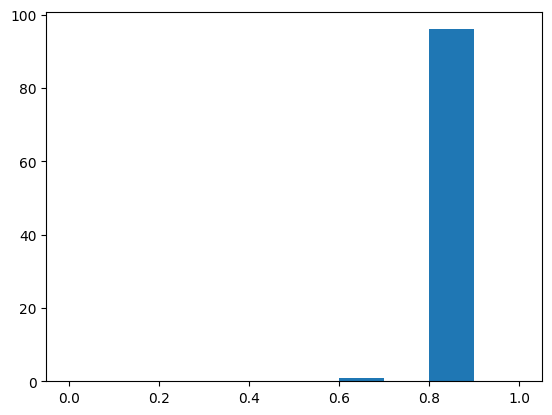

0.8453619341765132


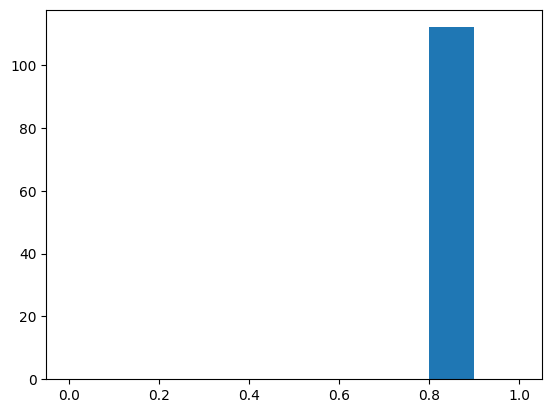

0.768750128922639


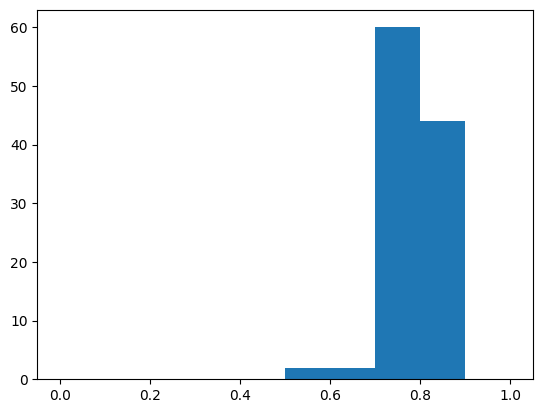

0.8550443950905857


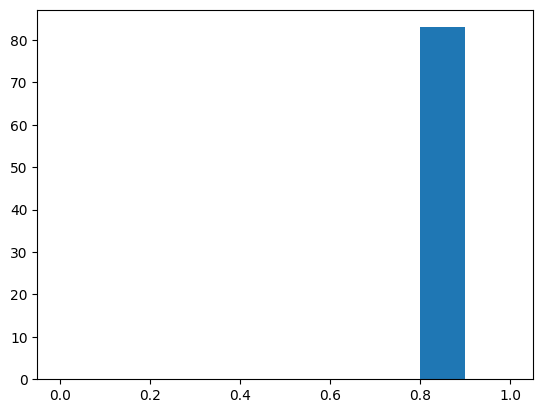

0.7827015944149183


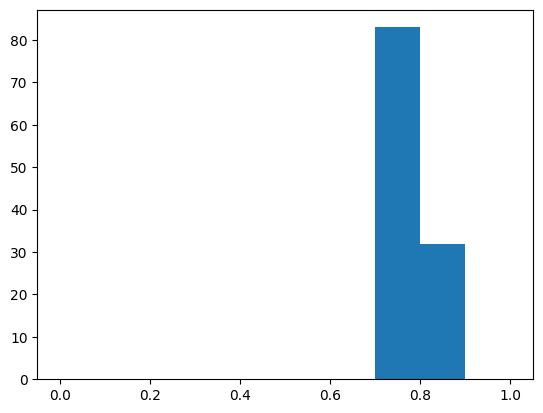

0.7212781270345052


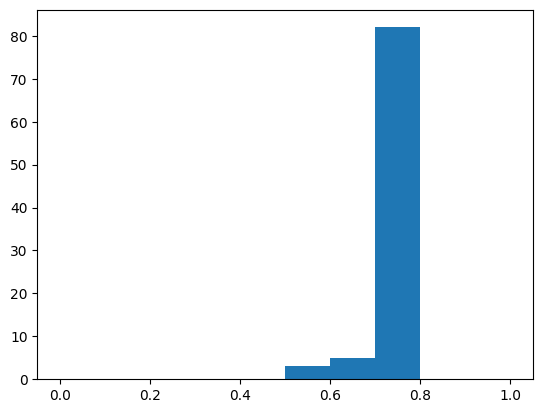

0.6931219637019079


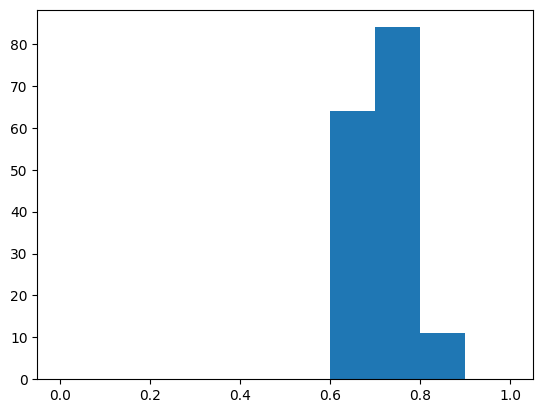

0.7557607463427952


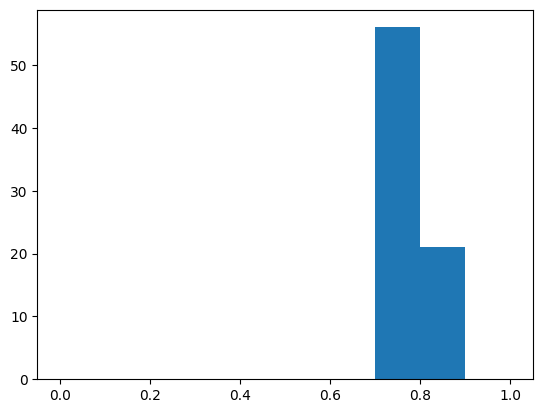

0.8070129601160685


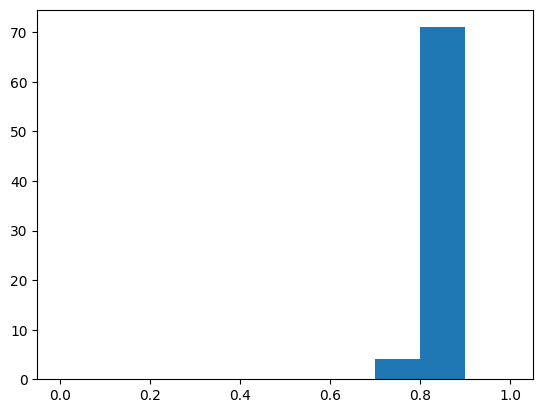

0.7903986867967543


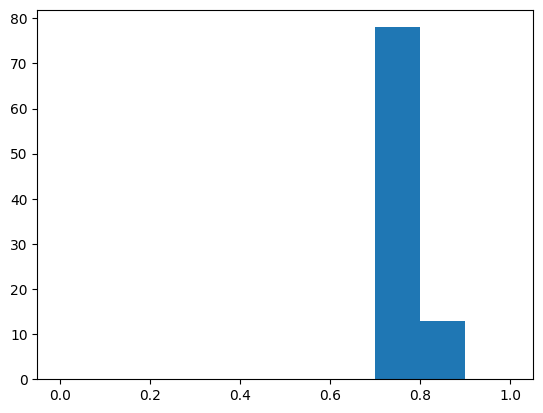

0.7338092320146616


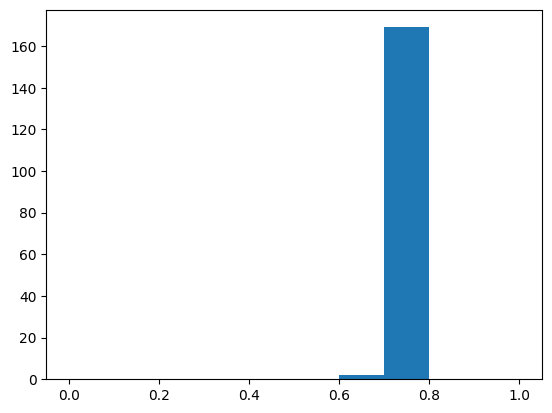

0.8220908443133036


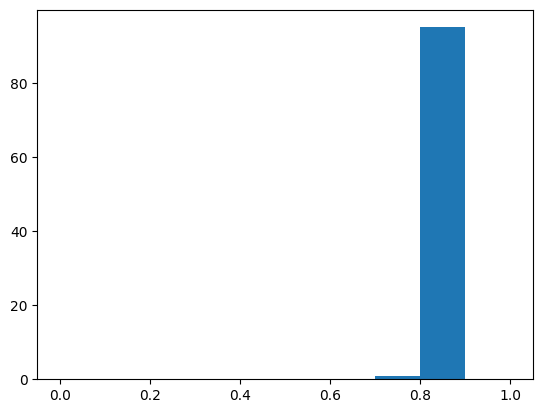

In [117]:
def plot_distribution_per_inchikey_with_little_distribution(selected_pairs, maximum_distance_between_extremes):
    inchikey_scores = {}
    for inchikey_1, inchikey_2, score in tqdm(selected_pairs):
        if inchikey_1 in inchikey_scores:
            inchikey_scores[inchikey_1].append(score)
        else:
            inchikey_scores[inchikey_1] = []
        if inchikey_2 in inchikey_scores:
            inchikey_scores[inchikey_2].append(score)
        else:
            inchikey_scores[inchikey_2] = []
    shuffled_inchikeys = list(inchikey_scores.keys())
    random.shuffle(shuffled_inchikeys)
    for inchikey in shuffled_inchikeys:
        scores = inchikey_scores[inchikey]
        if abs(min(scores) - max(scores)) < maximum_distance_between_extremes:
            print(sum(scores)/len(scores))
            plt.hist(scores, bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.001])
            plt.show()
plot_distribution_per_inchikey_with_little_distribution(selected_pairs, maximum_distance_between_extremes=0.3)

Text(0, 0.5, 'Count')

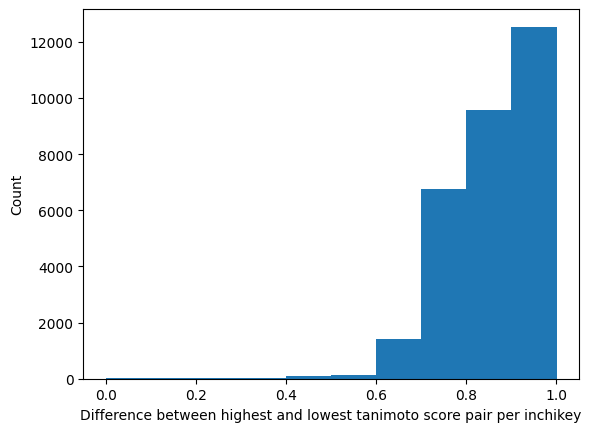

In [119]:
distance_between_highest_and_lowest_score = []
for inchikey in shuffled_inchikeys:
    scores = inchikey_scores[inchikey]
    distance_between_highest_and_lowest_score.append(abs(min(scores) - max(scores)))
plt.hist(distance_between_highest_and_lowest_score, bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.001])
plt.xlabel("Difference between highest and lowest tanimoto score pair per inchikey")
plt.ylabel("Count")